# TD3 : Représentation euclidienne des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import *

## 1.1 Représentation des données

In [2]:
notes = pd.read_csv("data/notes.txt", sep="\s+")
notes

,math,scie,fran,lati,d-m
jean,6.0,6.0,5.0,5.5,8
alin,8.0,8.0,8.0,8.0,9
anni,6.0,7.0,11.0,9.5,11
moni,14.5,14.5,15.5,15.0,8
didi,14.0,14.0,12.0,12.5,10
andr,11.0,10.0,5.5,7.0,13
pier,5.5,7.0,14.0,11.5,10
brig,13.0,12.5,8.5,9.5,12
evel,9.0,9.5,12.5,12.0,18


In [3]:
notes_df = notes
notes_df["Personne"] = notes_df.index
notes_df = pd.melt(notes, id_vars=["Personne"], value_name="Note", var_name="Matiere")
notes_df

,Personne,Matiere,Note
0,jean,math,6.0
1,alin,math,8.0
2,anni,math,6.0
3,moni,math,14.5
4,didi,math,14.0
5,andr,math,11.0
6,pier,math,5.5
7,brig,math,13.0
8,evel,math,9.0
9,jean,scie,6.0


Text(0.5, 1.0, 'Dispersion générale des notes')

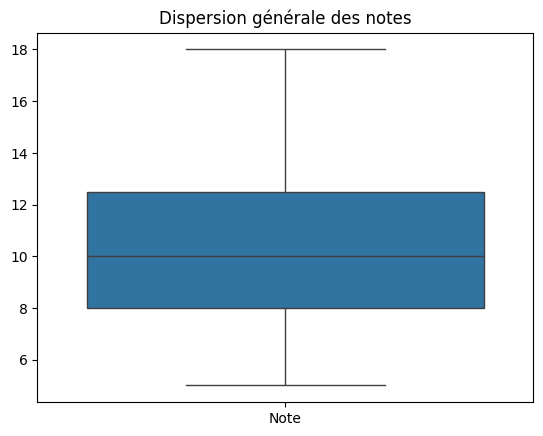

In [4]:
import seaborn as sn

sn.boxplot(notes_df).set_title("Dispersion générale des notes")


[Text(0.5, 1.0, 'Histogramme de la distribution globale des notes'),
 Text(0, 0.5, 'Nombre'),
 Text(0.5, 0, 'Note')]

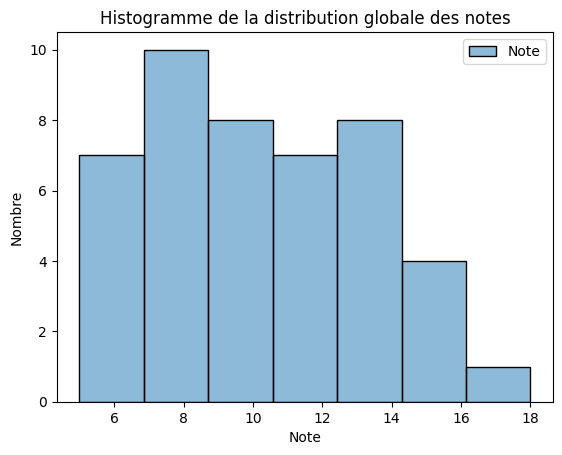

In [5]:
sn.histplot(notes_df).set(title = "Histogramme de la distribution globale des notes", ylabel = "Nombre", xlabel = "Note")

### Analyse et représentation succinte

[Text(0.5, 1.0, 'Diagramme en boites des notes en fonction de la matière')]

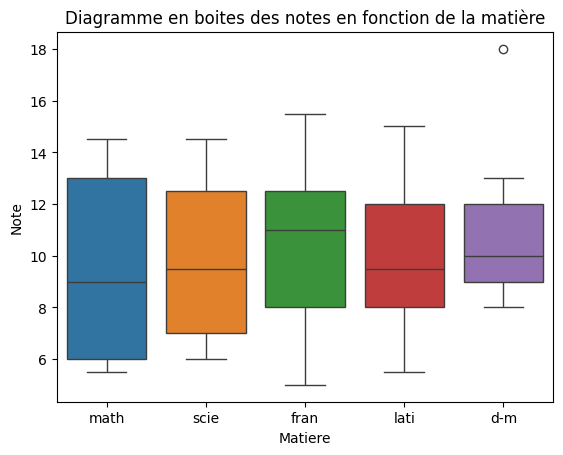

In [6]:
# Visualisation de la dispersion des notes

sn.boxplot(data = notes_df, y = "Note", x = "Matiere", hue = "Matiere").set(title = "Diagramme en boites des notes en fonction de la matière", )

<Axes: >

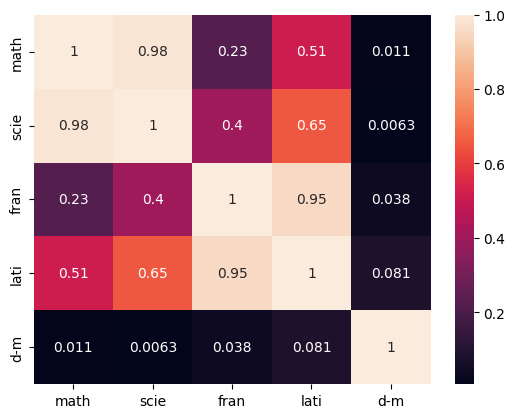

In [7]:
# Rapprocher certaines matières les unes des autres

corr = notes[["math", "scie", "fran", "lati", "d-m"]].corr()
sn.heatmap(corr, annot = True)

# On peut rapprocher les matières scientifiques entre elles, littéraires entre elles et les arts plastiques

Text(0.5, 1.0, 'Représentation des notes des étudiants dans chaque matière')

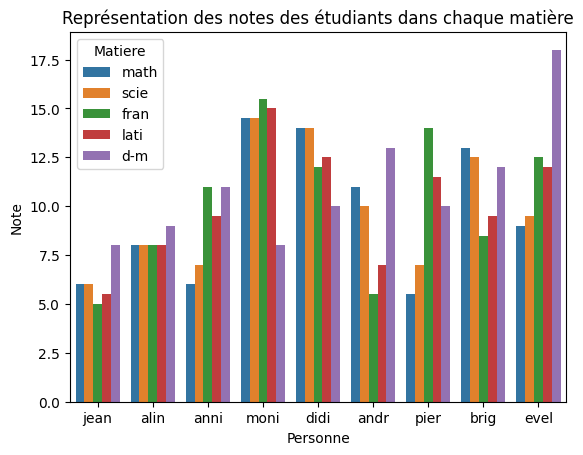

In [8]:
sn.barplot(data = notes_df, x = "Personne", y = "Note", hue = "Matiere").set_title("Représentation des notes des étudiants dans chaque matière")

<Axes: title={'center': 'Représentation des notes dans les matières scientifiques'}, xlabel='math', ylabel='scie'>

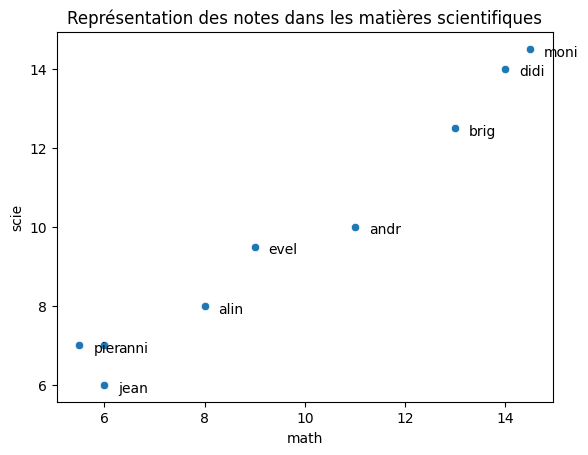

In [9]:
sn.scatterplot(data = notes, x = "math", y = "scie").set(title = "Représentation des notes dans les matières scientifiques")
add_labels(notes["math"], notes["scie"], notes.index)

<Axes: title={'center': 'Représentation des notes dans les matières littéraires'}, xlabel='fran', ylabel='lati'>

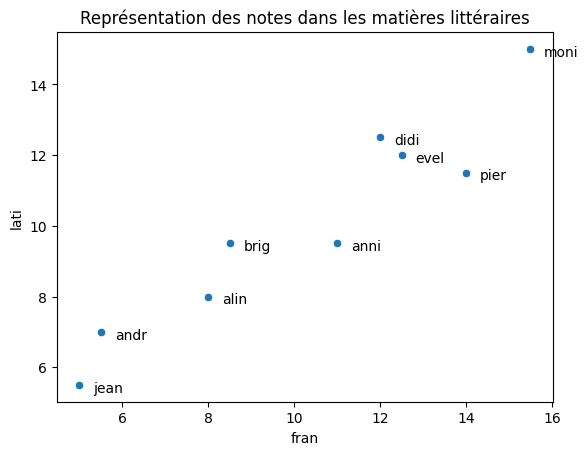

In [10]:
sn.scatterplot(data = notes, x = "fran", y = "lati").set(title = "Représentation des notes dans les matières littéraires")
add_labels(notes["fran"], notes["lati"], notes.index)

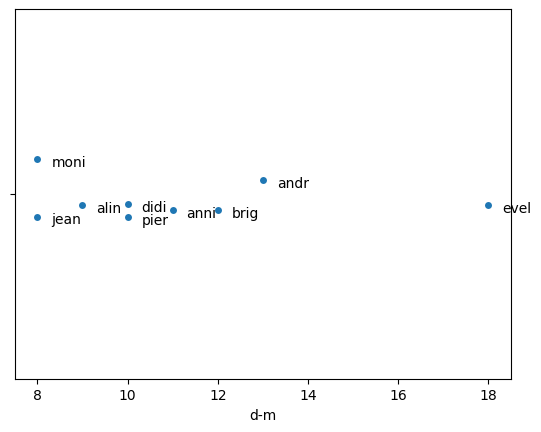

In [11]:
ax = sn.stripplot(x=notes['d-m'])
loc = ax.get_children()[0].get_offsets().data
add_labels(*loc.T, notes.index)
plt.show()

<Axes: title={'center': 'Moyenne des élèves dans les matières scientifiques en fonction de leur moyenne dans les matière littéraire'}, xlabel='moyenne_scientifique', ylabel='moyenne_litteraire'>

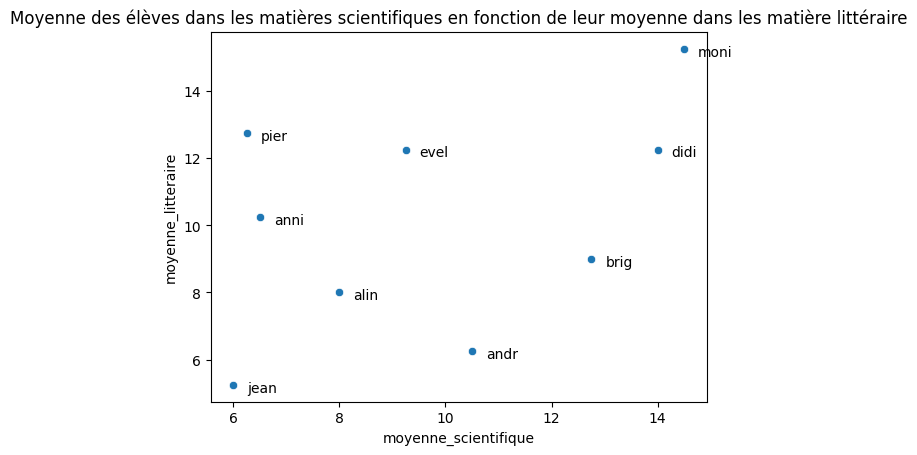

In [12]:
# Représenter les étudiants par leur moyenne dans les matières scientifiques et littéraires

notes["moyenne_scientifique"] = notes.apply(lambda row : (row["math"] + row["scie"]) / 2, axis=1)
notes["moyenne_litteraire"] = notes.apply(lambda row : (row["fran"] + row["lati"]) / 2, axis=1)


sn.scatterplot(data = notes, x = "moyenne_scientifique", y = "moyenne_litteraire").set(title = "Moyenne des élèves dans les matières scientifiques en fonction de leur moyenne dans les matière littéraire")
add_labels(notes["moyenne_scientifique"], notes["moyenne_litteraire"], notes.index)

### Projection et qualité de représentation

Objectif : trouver une base de représentation plus facile à visualiser tout en perdant le moins d'information possible

Un axe avec une grande inertie est un axe où la variance des données est la plus grande

#### Base A

In [13]:
notes = pd.read_csv("data/notes.txt", sep="\s+")

A = np.array([
    [
        1/2, 0, 1/2, 0, 0
    ],
    [
        1/2, 0, -1/2, 0, 0
    ],
    [0, 1/2, 0, 1/2, 0],
    [0, 1/2, 0, -1/2, 0],
    [0, 0, 0, 0, 1]
])


nouvelles_notes = notes.to_numpy().dot(np.linalg.inv(A).T)
anciennes_notes = A.dot(notes.T)

print(anciennes_notes)
print(nouvelles_notes)

# X1 : Moyenne scientifique
# X2 : Moyenne littéraire
# X3 : Meilleur en math qu'en sciences
# X4 : Meilleur en français qu'en latin
# X5 : Artistique


[[ 5.5   8.    8.5  15.   13.    8.25  9.75 10.75 10.75]
 [ 0.5   0.   -2.5  -0.5   1.    2.75 -4.25  2.25 -1.75]
 [ 5.75  8.    8.25 14.75 13.25  8.5   9.25 11.   10.75]
 [ 0.25  0.   -1.25 -0.25  0.75  1.5  -2.25  1.5  -1.25]
 [ 8.    9.   11.    8.   10.   13.   10.   12.   18.  ]]
[[12.  10.5  0.  -0.5  8. ]
 [16.  16.   0.   0.   9. ]
 [13.  20.5 -1.   1.5 11. ]
 [29.  30.5  0.   0.5  8. ]
 [28.  24.5  0.  -0.5 10. ]
 [21.  12.5  1.  -1.5 13. ]
 [12.5 25.5 -1.5  2.5 10. ]
 [25.5 18.   0.5 -1.  12. ]
 [18.5 24.5 -0.5  0.5 18. ]]


#### Base B1

In [14]:
notes = pd.read_csv("data/notes.txt", sep="\s+")

B1 = np.sqrt(2) * A

nouvelles_notes = notes.to_numpy().dot(B1)
anciennes_notes = nouvelles_notes.dot(np.linalg.inv(B1))

print(anciennes_notes)
print(nouvelles_notes)

# Représente la même chose dans une base orthogonale


[[ 6.   6.   5.   5.5  8. ]
 [ 8.   8.   8.   8.   9. ]
 [ 6.   7.  11.   9.5 11. ]
 [14.5 14.5 15.5 15.   8. ]
 [14.  14.  12.  12.5 10. ]
 [11.  10.   5.5  7.  13. ]
 [ 5.5  7.  14.  11.5 10. ]
 [13.  12.5  8.5  9.5 12. ]
 [ 9.   9.5 12.5 12.  18. ]]
[[ 8.48528137e+00  7.42462120e+00  2.22044605e-16 -3.53553391e-01
   1.13137085e+01]
 [ 1.13137085e+01  1.13137085e+01  0.00000000e+00  0.00000000e+00
   1.27279221e+01]
 [ 9.19238816e+00  1.44956890e+01 -7.07106781e-01  1.06066017e+00
   1.55563492e+01]
 [ 2.05060967e+01  2.15667568e+01  3.88578059e-16  3.53553391e-01
   1.13137085e+01]
 [ 1.97989899e+01  1.73241161e+01 -6.66133815e-16 -3.53553391e-01
   1.41421356e+01]
 [ 1.48492424e+01  8.83883476e+00  7.07106781e-01 -1.06066017e+00
   1.83847763e+01]
 [ 8.83883476e+00  1.80312229e+01 -1.06066017e+00  1.76776695e+00
   1.41421356e+01]
 [ 1.80312229e+01  1.27279221e+01  3.53553391e-01 -7.07106781e-01
   1.69705627e+01]
 [ 1.30814755e+01  1.73241161e+01 -3.53553391e-01  3.53553391e-01
 

#### Base B2

In [15]:
notes = pd.read_csv("data/notes.txt", sep="\s+")

mat = np.array([
    [
        1/2, 0, 1/2, 0, 0
    ],
    [
        0, 1/2, 0, 1/2, 0
    ],
    [1/2, 0, -1/2, 0, 0],
    [0, 1/2, 0, -1/2, 0],
    [0, 0, 0, 0, 1]
])

B2 = np.sqrt(2) * mat

nouvelles_notes = notes.to_numpy().dot(B2)
anciennes_notes = nouvelles_notes.dot(np.linalg.inv(B2))

print(anciennes_notes)
print(nouvelles_notes)

# X1 : moyenne math / français
# X2 : moyenne sciences / latin
# X3 : meilleur en math qu'en français
# X4 : meilleur en science qu'en latin
# X5 : artistique


[[ 6.   6.   5.   5.5  8. ]
 [ 8.   8.   8.   8.   9. ]
 [ 6.   7.  11.   9.5 11. ]
 [14.5 14.5 15.5 15.   8. ]
 [14.  14.  12.  12.5 10. ]
 [11.  10.   5.5  7.  13. ]
 [ 5.5  7.  14.  11.5 10. ]
 [13.  12.5  8.5  9.5 12. ]
 [ 9.   9.5 12.5 12.  18. ]]
[[ 7.77817459  8.13172798  0.70710678  0.35355339 11.3137085 ]
 [11.3137085  11.3137085   0.          0.         12.72792206]
 [12.02081528 11.66726189 -3.53553391 -1.76776695 15.55634919]
 [21.21320344 20.85965005 -0.70710678 -0.35355339 11.3137085 ]
 [18.38477631 18.7383297   1.41421356  1.06066017 14.14213562]
 [11.66726189 12.02081528  3.8890873   2.12132034 18.38477631]
 [13.78858223 13.08147545 -6.01040764 -3.18198052 14.14213562]
 [15.2027958  15.55634919  3.18198052  2.12132034 16.97056275]
 [15.2027958  15.2027958  -2.47487373 -1.76776695 25.45584412]]


## 1.2 Choix d'une représentation

#### Dans la base initiale

In [16]:
cov = np.cov(notes.to_numpy(), rowvar=False)

# Obtenir les valeurs propres

eig, _ = np.linalg.eig(cov)
print(cov)
print(np.trace(cov))


[[12.8125     11.15625     2.98958333  5.42708333  0.125     ]
 [11.15625    10.0625      4.63541667  6.16666667  0.0625    ]
 [ 2.98958333  4.63541667 13.56944444 10.45486111  0.4375    ]
 [ 5.42708333  6.16666667 10.45486111  8.90277778  0.75      ]
 [ 0.125       0.0625      0.4375      0.75        9.75      ]]
55.09722222222222


#### Dans la base A

In [17]:
nouvelles_notes = notes.to_numpy().dot(np.linalg.inv(A).T)

cov = np.cov(nouvelles_notes, rowvar=False)

# Obtenir les valeurs propres

eig, _ = np.linalg.eig(cov)
print(cov)
print(np.trace(cov))



[[45.1875     19.21875     2.75       -3.96875     0.1875    ]
 [19.21875    43.38194444 -2.38541667  4.66666667  1.1875    ]
 [ 2.75       -2.38541667  0.5625     -0.90625     0.0625    ]
 [-3.96875     4.66666667 -0.90625     1.5625     -0.3125    ]
 [ 0.1875      1.1875      0.0625     -0.3125      9.75      ]]
100.44444444444444


#### Dans la base B1

In [18]:
nouvelles_notes = notes.to_numpy().dot(B1)

cov = np.cov(nouvelles_notes, rowvar=False)

# Obtenir les valeurs propres

eig, _ = np.linalg.eig(cov)
print(cov)
print(np.trace(cov))



[[22.59375     9.609375    1.375      -1.984375    0.1875    ]
 [ 9.609375   21.69097222 -1.19270833  2.33333333  1.1875    ]
 [ 1.375      -1.19270833  0.28125    -0.453125    0.0625    ]
 [-1.984375    2.33333333 -0.453125    0.78125    -0.3125    ]
 [ 0.1875      1.1875      0.0625     -0.3125     19.5       ]]
64.84722222222223


#### Dans la base B2

In [19]:
nouvelles_notes = notes.to_numpy().dot(B2)

cov = np.cov(nouvelles_notes, rowvar=False)

# Obtenir les valeurs propres

eig, _ = np.linalg.eig(cov)
print(cov)
print(np.trace(cov))



[[16.18055556 15.83680556 -0.37847222 -0.04513889  0.5625    ]
 [15.83680556 15.64930556  0.74652778  0.57986111  0.8125    ]
 [-0.37847222  0.74652778 10.20138889  5.77430556 -0.3125    ]
 [-0.04513889  0.57986111  5.77430556  3.31597222 -0.6875    ]
 [ 0.5625      0.8125     -0.3125     -0.6875     19.5       ]]
64.84722222222223


#### Dans la base B3

In [20]:
B3 = np.array([
    [
        1/2, 1/2, 1/2, 1/2, 0
    ],
    [
        1/2, 1/2, -1/2, 1/2, 0
    ],
    [1/2, -1/2, -1/2, 1/2, 0],
    [1/2, -1/2, 1/2, -1/2, 0],
    [0, 0, 0, 0, 1]
])

nouvelles_notes = notes.to_numpy().dot(B3)

cov = np.cov(nouvelles_notes, rowvar=False)

# Obtenir les valeurs propres

eig, _ = np.linalg.eig(cov)
print(cov)
print(np.trace(cov))



[[31.75173611  0.45138889 -0.08333333 16.27604167  0.6875    ]
 [ 0.45138889 12.53298611  3.44270833  4.33333333 -0.5       ]
 [-0.08333333  3.44270833  0.984375    1.0625      0.1875    ]
 [16.27604167  4.33333333  1.0625      9.703125   -0.0625    ]
 [ 0.6875     -0.5         0.1875     -0.0625      9.75      ]]
64.72222222222223


## Intertie cumulée enveloppante

In [27]:
# Question 13 : Fonction qui renvoie les inerties cumulées
def random_cumsums():
    rng = np.random.default_rng()
    U, _ = np.linalg.qr(rng.normal(size=(5, 5)))
    Xc = notes[["math", "scie", "fran", "lati", "d-m"]].to_numpy()
    C = np.cov(Xc @ U, bias=True, rowvar=False)
    return np.cumsum(np.diag(C))

In [30]:
data = [random_cumsums() for i in range(20)]
X0 = pd.DataFrame(data, columns=[f"Axe {i+1}" for i in range(5)])
X0.index.name = "Base"
X0 = X0.reset_index()
X0 = X0.melt(id_vars="Base", var_name="Axe", value_name="Inertie cumulée")
X0

,Base,Axe,Inertie cumulée
0,0,Axe 1,2.750956
1,1,Axe 1,22.857365
2,2,Axe 1,4.972311
3,3,Axe 1,12.282408
4,4,Axe 1,0.799924
...,...,...,...
95,15,Axe 5,48.975309
96,16,Axe 5,48.975309
97,17,Axe 5,48.975309
98,18,Axe 5,48.975309


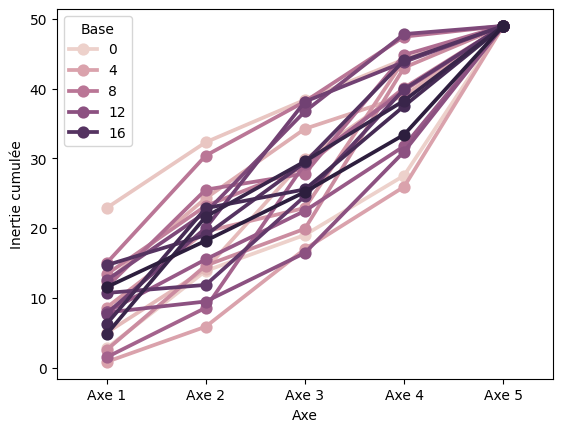

In [38]:
# Question 15 : Visualisation avec pointplot

ax = sn.pointplot(data = X0, x="Axe", y = "Inertie cumulée", hue = "Base")

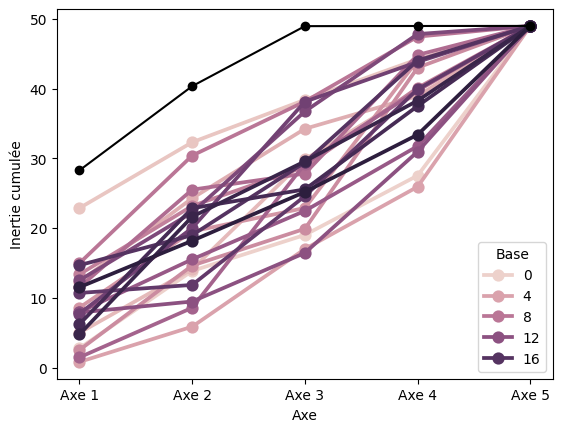

In [40]:
# Question 16 : Particularité de la base orthogonale

ax = sn.pointplot(data = X0, x="Axe", y = "Inertie cumulée", hue = "Base")
Bx = np.array([[0.515, -0.567, 0.051, -0.289, -0.573],
[0.507, -0.372, 0.014, 0.553, 0.546],
[0.492, 0.65, -0.108, 0.394, -0.41],
[0.485, 0.323, -0.023, -0.674, 0.453],
[0.031, 0.113, 0.992, 0.034, -0.013]])

Xc = notes[["math", "scie", "fran", "lati", "d-m"]].to_numpy()
C = np.cov(Xc @ Bx, bias=True, rowvar=False)
csx = np.cumsum(np.diag(C))

ax.plot(range(5), csx, 'k-o', zorder = 100)
plt.show()

## Inertie par rapport à un axe

In [22]:
from src.inertia import inertia_factory
import math 
import numpy as np

rng = np.random.default_rng()

n, p = 100, 2
X = rng.normal(size=(n, p))
feat_metric = np.eye(p)
sample_metric = 1 / n * np.eye(n)

X0 = np.array([[1, 0], [0, 1]])
n0, p0 = X0.shape
feat_metric0 = np.eye(p0)
sample_metric0 = 1 / n0 * np.eye(n0)
feat_inner0, inertia_point0, inertia_axe0 = inertia_factory(feat_metric0,
sample_metric0)

p0 = np.zeros(2)
v = np.array([0, 1])
p1 = np.array([-1, 0])
assert(math.isclose(inertia_point0(X0), .5))
assert(math.isclose(inertia_point0(X0, p0), 1.))
assert(math.isclose(inertia_axe0(X0, v), .5))
assert(math.isclose(inertia_axe0(X0, v, p1), 2.5))

In [23]:
# Question 20 : Inertie par rapport à un point quelconque
point = rng.normal(size=(1, 2))[0]

feat_inner, inertia_point, inertia_axe = inertia_factory(feat_metric, sample_metric)
inertia_point(X, point)


2.281265024937014

In [24]:
# Question 21 : Formule de Huygens (Ia = Ig + p * d²(a, g))
inertie_a = inertia_point(X, point)

inertie_centre_grav = inertia_point(X)
sum_p = np.sum(sample_metric)
centre_grav = np.mean(X, axis = 0)
distance_a_g = math.dist(point, centre_grav)
assert(math.isclose(inertie_a, inertie_centre_grav + sum_p * distance_a_g**2))

In [47]:
# Question 22 : Inertie de X par rapport à un axe quelconque

p0 = np.array([2, 3])
v = np.array([2, 1])
inertia_axe(X, v, p0)

4.605935631757721

In [48]:
# Question 23 : Vérifier la formule de Huygens par rapport à une droite (If = Ifg + p * d²(F, Fg))

g = np.mean(X, axis=0)
mu = sum(np.diag(sample_metric))
vn = v / math.sqrt(feat_inner(v, v))
k = feat_inner(p0 - g, vn)
n = (p0 - g) - k * vn
inertia_axe(X, v, g) + mu * feat_inner(n, n)

4.605935631757721